In [30]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
import matplotlib.pyplot as plt

# Optimal choices under different risk-profiles

In this project we're going to look at an investor, who can buy different risky stocks, and how his optimal choice changes, depending on his utility function. 
To begin, we will consider two stock (denoted q), valued at 10 each, and an initial investor budget, in period 0, of 100 (denoted w) (all currency in dollars): 
$$ q_a = q_b = 10, \hspace{1mm} w_0 = 100 $$

The period after they are acquired their value will be 15 and 5, respectively, in state u, or 5 and 12, respectively, in state d. Both states are equally probable. Denote the probabillity p, and the payoff r: 
$$ p = \frac{1}{2}, \hspace{1mm} r_{au} = 15, \hspace{1mm} r_{bu} = 5, \hspace{1mm} r_{ad} = 5, \hspace{1mm} r_{bd} = 12 \\ $$

The investors utility function can be written as: 
$$ u(w) = \sqrt{w} $$

Thus, he wants to maximise his expected utility. Let a and b denote the number of options bought, then the problem can be written as: 
$$ max_{a,b} \quad E(u(w_1)) = p \cdot \sqrt{w_{1u}} + (1-p) \cdot \sqrt{w_{1d}} \\ 
w_1 = a \cdot r_{a} + b \cdot r_b \\ 
w_0 \geq a \cdot q_{a} + b \cdot q_b \\
a,b \geq 0 $$ 

In [31]:
qa = 10
qb = 10 
w0 = 100
p = 0.5
rau = 15
rbu = 5
rad = 5
rbd = 12


# We define the expected utility function, here negative so we can minimize it later 
def _Eu(a,b):
    return -(p*np.sqrt(a*rau+b*rbu)+(1-p)*np.sqrt(a*rad+b*rbd))

# Here we define the python-compatible version for use in the optimization, that is defining the shares in a tuple
def Eu(x):
    return _Eu(x[0],x[1])

# We define the budget constraint, which is violated if negative
def constraints(x):
    return w0-x[0]*qa-x[1]*qb

# The investor is bound to use, at most, his whole budget on one option, which we define here. We also define the budget constraint, to be used with the minimize method below. 
bound = (0,qa*w0)
bounds = (bound, bound)
ineq_con = {'type': 'ineq', 'fun': constraints}

# Initial guess: 
initial_guess = [5,5]

# We call the minimize method from scipy and hand it our expectedutility function, initial guess, bounds and constraints. 
result = sp.optimize.minimize(Eu, initial_guess, method = 'SLSQP',
                  bounds=bounds, constraints = [ineq_con],
                  options={'disp':True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.700883611487832
            Iterations: 5
            Function evaluations: 21
            Gradient evaluations: 5


In [32]:
print('\nx = ',result.x)


x =  [8.02547122 1.97452878]


We see here, that the investor buys 8 units of stock a and 2 units of stock b. This investor has a concave utility function meaning, that he is risk averse. Therefore, he faces a tradeoff between between the less risky stock b, and the higher expected return of stock a. 

# Visualisation of the results across parametrizations 

**2.1: Different values of p:** First we will solve and visualize the investment share of stock a and b for different values of the p, the probability for the state u.

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -10.954451150103322
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -10.522964112521338
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -10.091477074939357
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.669129324763523
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.569664683651217
            Iterations: 5
            Function eval

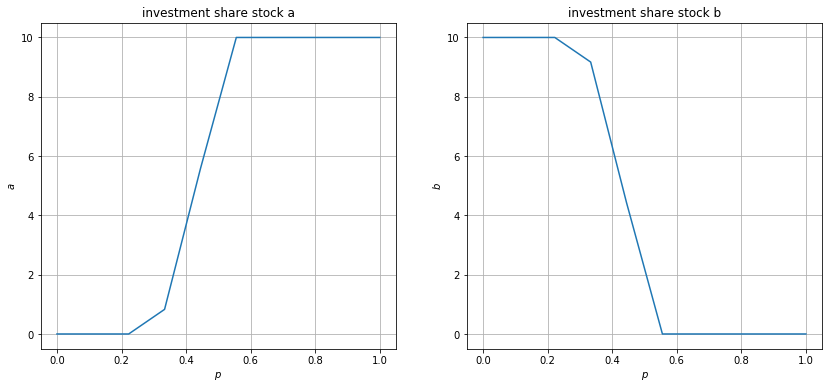

In [33]:
# We create empty lists for our values of a, b & p, so that we can later plot them graphically.
a_values = []
b_values = []
p_values = []

# We loop through different values for p between 0 and 1, and optimize using the method SLSQP, 
# which can use bounds and constraints in multiple dimensions.
for p in np.linspace(0,1,10):
    result = optimize.minimize(Eu,initial_guess,method='SLSQP',bounds=bounds,constraints=[ineq_con],options={'disp':True})
    
    a_svar = result.x[0]
    b_svar = result.x[1]

# Now that we have created our values with the loop, we append them to our empty lists.   
    a_values.append(a_svar)
    b_values.append(b_svar)
    p_values.append(p)

# Now we specify that we will make a plot. 
fig = plt.figure(figsize=(14,6))

# We generate our first figure (left) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,1)

# Here we plot the values for p on the x-axis and the values for a on the y-axis
ax_left.plot(p_values,a_values)

# We give the plot a title and set labels:
ax_left.set_title('investment share stock a')
ax_left.set_xlabel('$p$')
ax_left.set_ylabel('$a$')
ax_left.grid(True)

# We generate our second figure (right) with 1 row and 2 columns
ax_right = fig.add_subplot(1,2,2)

# Here we plot the values for p on the x-axis and the values for b on the y-axis
ax_right.plot(p_values,b_values)

# We give the plot a title and set labels:
ax_right.set_title('investment share stock b')
ax_right.set_xlabel('$p$')
ax_right.set_ylabel('$b$')
ax_right.grid(True)

The left plot shows that when the probability for the state u increaces so does the investment in stock a. The investment of stock a start out at 0 with the p values between 0 and 0.2. When the p is more than 0.2 the investemtn in stock a increases. Finally when the probability for the state u is more than 0.5 investment in stock a is 10 equivalent to the whole budget. The explanation is that when the probability for the state u increaces so does the expected value for stock a becauce in this state the payoff is 15 USD compared to 5 in state d.

The right plot naturally has the same growth just upside down. The invesment of stock b starts out at 10 equivalent to the whole budget when p is between 0 and 0.2. For larger p values the investment in stock b descreases. When the p value is more than 0.5 investment in stock b is 0. The explanation is that when the probability for the state u increaces, the expected value for stock b decreases becauce in this state the payoff is 5 USD compared to 12 in state d.

**2.2: Different values of $r_{au}$:** Now we solve and visualize the investment share of stock a and b for different values of the $r_{au}$.

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -7.0710678118654755
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -7.071067811865476
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -7.0710678118654755
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -7.0710678118654755
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -8.16496580927726
            Iterations: 5
            Function evalua

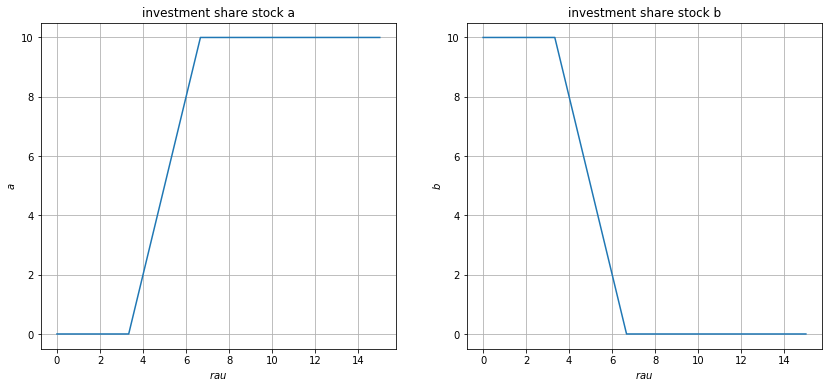

In [34]:
# We create empty lists for our values of a, b & rau, so that we can later plot them graphically.
a_values = []
b_values = []
rau_values = []

# We loop through different values for rau between 0 and 1, and optimize using the method SLSQP, 
# which can use bounds and constraints in multiple dimensions.
for rau in np.linspace(0,15,10):
    result = optimize.minimize(Eu,initial_guess,method='SLSQP',bounds=bounds,constraints=[ineq_con],options={'disp':True})
    
    a_svar = result.x[0]
    b_svar = result.x[1]

# Now that we have created our values with the loop, we append them to our empty lists.   
    a_values.append(a_svar)
    b_values.append(b_svar)
    rau_values.append(rau)

# Now we specify that we will make a plot. 
fig = plt.figure(figsize=(14,6))

# We generate our first figure (left) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,1)

# Here we plot the values for rau on the x-axis and the values for a on the y-axis
ax_left.plot(rau_values,a_values)

# We give the plot a title and set labels:
ax_left.set_title('investment share stock a')
ax_left.set_xlabel('$rau$')
ax_left.set_ylabel('$a$')
ax_left.grid(True)

# We generate our second figure (right) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,2)

# Here we plot the values for rau on the x-axis and the values for b on the y-axis
ax_left.plot(rau_values,b_values)

# We give the plot a title and set labels:
ax_left.set_title('investment share stock b')
ax_left.set_xlabel('$rau$')
ax_left.set_ylabel('$b$')
ax_left.grid(True)

The left plot shows that when the value of $r_{au}$ increaces so does the investment in stock a. The investment of stock a start out at 0 with the $r_{au}$ values between 0 and 3. When the $r_{au}$ is more than 3 the investemtn in stock a increases. Finally when $r_{au}$ is more than 6.5 invesment in stock a is 10 equivalent to the whole budget. The explanation is that when $r_{au}$ increaces so does the expected value for stock a becauce $r_{au}$ is the payoff for stock a in the state u.

The right plot naturally has the same growth just upside down. The invesment of stock b starts out at 10 equivalent to the whole budget when the $r_{au}$ value is between 0 and 3. For larger $r_{au}$ values the investment in stock b descreases. When the $r_{au}$ value is more than 6.5 investment in stock b is 0. The explanation is that when $r_{au}$ increaces so does the expected value for stock a, and becauce the investor seeks the highest payoffs, he switch stock b for a.

# Ammending the utility functions

**3.1: Risk neutral investor**

We now consider an investor with a linear utility function $ u(w) = 2 \cdot w $. Otherwise nothing is changed. 

In [35]:
# Defining the parameter values for all our predetermined unknowns  
q_a=10
q_b=10
w0 = 100
p=0.5
rau=15
rbu=5
rad=5
rbd=12

# Defining the utility functions, now as an investor with riskneutrality, that is a linear utility function
def u_u(a,b):
    return 2*(a*rau+b*rbu)
def u_d(a,b):
    return 2*(a*rad+b*rbd)

# Defining the joint expected utility function, and defining the python-compatible version for use in the optimization, that is defining the shares in a tuple
def E_u(a,b):
    return -(p*u_u(a,b)+(1-p)*u_d(a,b))
def E_ux(x):
    return E_u(x[0],x[1])

# Defining the budget constraint, the bounds, and the initial guess
def ineq_constraint(x):
    return w0 - x[0]*q_a-x[1]*q_b
bound = (0,q_a*w0)
bounds = (bound,bound)
ineq_con = {'type':'ineq','fun': ineq_constraint}
initial_guess = [5,5]

# Optimizing and printing the result
result = optimize.minimize(E_ux,initial_guess,method='SLSQP',bounds=bounds,constraints=[ineq_con],options={'disp':True})
print(result.x)

a_mean = [rau,rad]
print(np.mean(a_mean))
b_mean = [rbu,rbd]
print(np.mean(b_mean))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -199.99999999997644
            Iterations: 3
            Function evaluations: 12
            Gradient evaluations: 3
[10.  0.]
10.0
8.5


Deduction: the result of the optimizing behaviour is to allocate all ressources to buy stock a. This is complying with the general theory of riskneutrality, which implies that the investor should choose to invest only in the stock that yields the most, not caring for the risks involved. Expressed is the expected return (=mean)

**3.2: Risk loving investor**

We now consider an investor with a convex utility function $ u(w) = w^2 $. Otherwise nothing is changed. 

In [36]:
# Defining the utility functions, now as an investor that is risk loving, that is a convex utility function
def u_u(a,b):
    return (a*rau+b*rbu)**2
def u_d(a,b):
    return (a*rad+b*rbd)**2

# Defining the joint expected utility function, and defining the python-compatible version for use in the optimization, that is defining the shares in a tuple
def E_u(a,b):
    return -(p*u_u(a,b)+(1-p)*u_d(a,b))
def E_ux(x):
    return E_u(x[0],x[1])

# Defining the budget constraint, the bounds, and the initial guess
def ineq_constraint(x):
    return w0 - x[0]*q_a-x[1]*q_b
bound = (0,q_a*w0)
bounds = (bound,bound)
ineq_con = {'type':'ineq','fun': ineq_constraint}
initial_guess = [9,1]

# Optimizing and printing the result
result = optimize.minimize(E_ux,initial_guess,method='SLSQP',bounds=bounds,constraints=[ineq_con],options={'disp':True})
print(result.x)

a_std = [rau,rad]
print(np.std(a_std))
b_std = [rbu,rbd]
print(np.std(b_std))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -12499.992052294274
            Iterations: 6
            Function evaluations: 8
            Gradient evaluations: 2
[9.99999682 0.        ]
5.0
3.5


Deduction: the result of the optimizing behaviour is to allocate all ressources to buy stock a. This is complying with the general theory of risk loving, which implies that the investor should choose to invest only in the stock that has the highest risk, not caring for yield involved. Expressed is the standard deviation.

# Extensions: more stocks and outcomes  

**4.1: A model with three stocks:** First we will extend the model with one more stock: c. This stock will be a risk free asset and will therefore have the same payoff in the two outcomes. the problem can be written as: 
$$ max_{a,b,c} \quad E(u(w_1)) = p \cdot \sqrt{w_{1u}} + (1-p) \cdot \sqrt{w_{1d}} \\ 
w_1 = a \cdot r_{a} + b \cdot r_b+c \cdot r_c \\ 
w_0 \geq a \cdot q_{a} + b \cdot q_b +c \cdot q_c\\
a,b,c \geq 0 $$ 

In [37]:
# The parameters are defined. The two new ones are rcu and rcd, the payoff for stock c in the outcome u and d.
w0 = 100
p = 0.5
qa = 10
qb = 10
qc = 10
rau = 15
rbu = 5
rcu = 9.1
rad = 5
rbd = 12
rcd = 9.1

# We define the two new utility functions for the two outcomes, now with the payoff for stock c.
def utilityu(a,b,c):
    return np.sqrt(a*rau+b*rbu+c*rcu)
def utilityd(a,b,c):
    return np.sqrt(a*rad+b*rbd+c*rcd)
# We define overall expected utility function and make the values of a, b and c into a tuple.
def _Eu(a,b,c):
    return -(p*utilityu(a,b,c)+(1-p)*utilityd(a,b,c))
def Eu(x):
    return _Eu(x[0],x[1],x[2])
# We define the budget constraint. It is violated if negative.
def ineq_constraint(x):
    return w0 - x[0]*qa-x[1]*qb-x[2]*qc
# We set up the same bound for a, b and c: 0 to the whole budget can be used on any of them.
bound = (0,qa*w0)
bounds = (bound, bound, bound)
ineq_con = {'type': 'ineq', 'fun': ineq_constraint}

# We call optimizer using the method SLSQP, which can use bounds and constraints in multiple dimensions.
initial_guess = [3,3,3] # fit the equality constraint
result = optimize.minimize(Eu,initial_guess,method='SLSQP',bounds=bounds,constraints=[ineq_con],options={'disp':True})

print('\nx = ',result.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.698176314105153
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 7

x =  [6.84291448 0.27421306 2.88287246]


The invesor chooses 6.84 units of stock a, 0.27 units of stock b and 2.88 units of stock c. This particular combinations can be explained by the expected paysoffs and the risk of the stocks. As we have looked at in section 3: the investor is risk-averse. Stock a is chosen before b and c because of the relativly higher expected return: even thou it is possible to have a payoff on 9.1 for certain in stock b the investor is not risk-averse enough to give op the extra expected payoffs in stock a. Stock c is chosen before b because is has both lower risk and higher expected return.

**4.2: A model with three outcomes:** Now we will extend the model with one more outcome: m. This will be a medium outcome with the payoff, 8, for a and 10 for b. The probality for the three different outcomes will all be 1/3. the problem can be written as: 
$$ max_{a,b} \quad E(u(w_1)) = p \cdot \sqrt{w_{1u}} + t \cdot \sqrt{w_{1d}} + (1-p-t)\cdot \sqrt{w_{1m}} \\ 
w_1 = a \cdot r_{a} + b \cdot r_b \\ 
w_0 \geq a \cdot q_{a} + b \cdot q_b \\
a,b \geq 0 $$ 

In [38]:
# The parameters are defined. The three new ones are t, ram and rbm:
# the probability for outcome d and the payoff for stock a and b in outcome m.
w0 = 100
p = 1/3
t = 1/3
qa = 10
qb = 10
rau = 15
rbu = 5
rad = 5
rbd = 12
ram = 8
rbm = 10

# We define the three utility functions for the three outcomes, now with the utility function for outcome m.
def utilityu(a,b):
    return np.sqrt(a*rau+b*rbu)
def utilityd(a,b):
    return np.sqrt(a*rad+b*rbd)
def utilitym(a,b):
    return np.sqrt(a*ram+b*rbm)
# We define overall expected utility function and make the values of a, b into a tuple.
def _Eu(a,b):
    return -(p*utilityu(a,b)+t*utilityd(a,b)+(1-p-t)*utilitym(a,b))
def Eu(x):
    return _Eu(x[0],x[1])
# We define the budget constraint. It is violated if negative.
def ineq_constraint(x):
    return w0 - x[0]*qa-x[1]*qb
# We set up the same bound for a and b: 0 to the whole budget can be used on any of them.
bound = (0,qa*w0)
bounds = (bound, bound)
ineq_con = {'type': 'ineq', 'fun': ineq_constraint}

# We call optimizer using the method SLSQP, which can use bounds and constraints in multiple dimensions.
initial_guess = [5,5] # fit the equality constraint
result = optimize.minimize(Eu,initial_guess,method='SLSQP',bounds=bounds,constraints=[ineq_con],options={'disp':True})

print('\nx = ',result.x)
    

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.569689334643734
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 6

x =  [5.36024968 4.63975032]


The invesor chooses 5.36 units of stock a and 4.64 units of stock b. The share of stock b has increased alot Compared to the model in section 1. The explanation is that the expected value for b has increased from 8.5 to 9. The expected return on stock a is still the largest with 9.3 and therefore still has the largest share.

# Conclusion

In this project we have seen that the preferences for risk and expected return, impacts the choice of the portfolio composition between the two stocks very much, in relation to the different utility functions that we have evaluated in this project. 